[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/babbu3682/Med_ChatGPT_tutorial/blob/main/Notebook/colab/Hands_On_EDA.ipynb)

- ##### '파일' -> '드라이브에 사본 저장' 클릭

# 데이터셋 다운로드

* kaggle 대회 링크: https://www.kaggle.com/competitions/rsna-breast-cancer-detection/overview
* 데이터셋 다운로드 링크: https://drive.google.com/drive/folders/1gSKvZ5BoSIt4Dk_LhdYOoMIBwREcVvwN?usp=sharing

In [15]:
# 데이터셋 다운로드 할때 주의할 점:
# Med_ChatGPT_tutorial 폴더 자체에서 'Drive에 바로가기 추가' 클릭 --> '모든 위치' --> '내 드라이브' 클릭

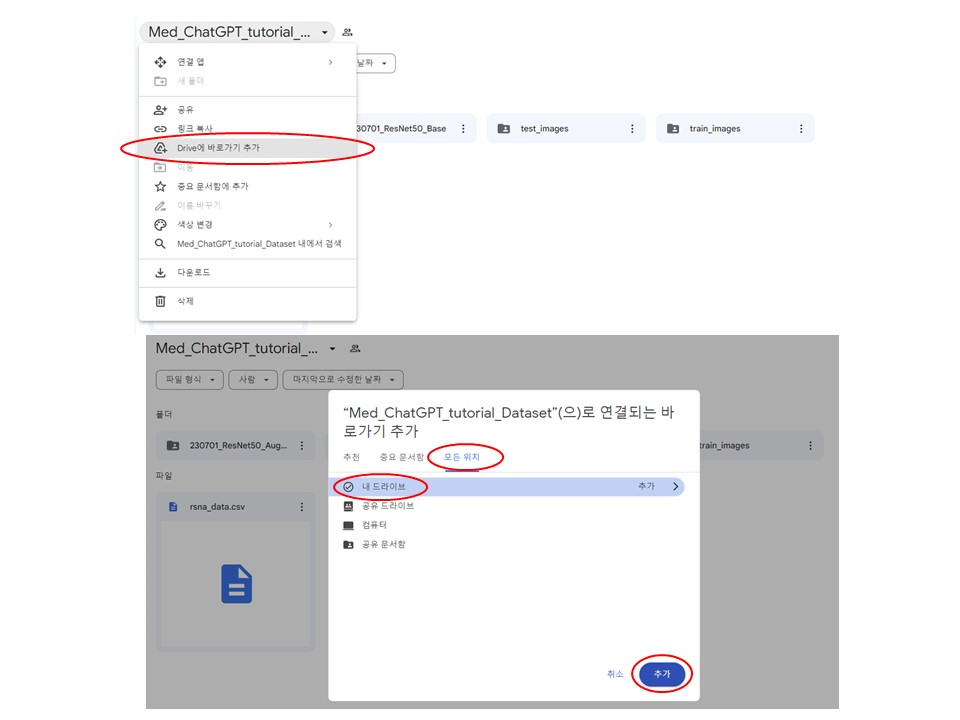

In [ ]:
# 필요한 라이브러리 설치
!pip install pydicom
!pip install SimpleITK
!pip install pylibjpeg pylibjpeg-libjpeg pylibjpeg-openjpeg # GDCM 에러 해결

In [ ]:
# 코랩에서 한글깨짐 현상 해결 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt # matplotlob import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [ ]:
# pip install 하였으면, 런타임 다시 시작하기!

# Dataset files

- ##### [train/test]_images/[patient_id]/[image_id].dcm

- #### sample_submission.csv 

- #### [train/test].csv Metadata for each patient and image. 

In [ ]:
# google colab과 google drive 연동 (마운트)
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# /content에 Med_ChatGPT_tutorial 폴더가 생성됨.
!git clone https://github.com/babbu3682/Med_ChatGPT_tutorial.git

In [ ]:
# 정리:
# 위의 두 코드를 실행했다면,
# 데이터 경로는 /content/drive/MyDrive/Med_ChatGPT_tutorial_Dataset
# 코드 경로는 /content/Med_ChatGPT_tutorial

# EDA from the given metadata

In [ ]:
import pandas as pd

# train csv 불러오기
test_data = pd.read_csv("/content/Med_ChatGPT_tutorial/dataset/train.csv")
test_data.head()

In [ ]:
# test csv 불러오기
test_data = pd.read_csv("/content/Med_ChatGPT_tutorial/dataset/test.csv")
test_data.head()

- 오로지 Test.csv에 존재하는 변수에 집중!
- [site_id / patient_id / image_id / laterality / view / age / implant / machine_id]에 따른 cancer 비율 분석.

In [ ]:
'''
[Explore Data]
===INSTRUCT===
데이터 과학자 역할을 맡아 저를 위해 코딩해 주셨으면 합니다.
Pandas, Seaborn and Matplotlib을 사용하여 데이터의 패턴과 추세를 파악하는 데이터 탐색 스크립트 코드를 작성해 주세요.
Metadata 정보가 담긴 csv 파일이 존재하며, csv 파일을 읽어와서 데이터 탐색을 진행해 주세요.
관심변수는 ['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age', 'implant', 'machine_id', 'caner'] 입니다.
관심변수 중 target 변수는 'cancer' 입니다.

===INFO===
CSV Path: “/content/Med_ChatGPT_tutorial/dataset/train.csv”
CSV Description:
- site_id: ID code for the source hospital.
- patient_id: ID code for the patient.
- image_id: ID code for the image.
- laterality: Whether the image is of the left or right breast.ㅁ
- view: The orientation of the image. The default for a screening exam is to capture two views per breast.
- age: The patient's age in years.
- implant: Whether or not the patient had breast implants. Site 1 only provides breast implant information at the patient level, not at the breast level.
- machine_id: An ID code for the imaging device.
- cancer: Whether or not the breast was positive for malignant cancer. The target value. Only provided for train.

===TASK===
다음의 절차에 따라 "단계별"로 오직 관심변수 간의 관계만 탐색합니다.
    0. CSV 파일을 읽고 데이터를 로드합니다.
    1. 전체 이미지 수를 출력해주세요.
    2. 고유 환자 수를 출력해주세요.
    3. 고유 이미지 수를 출력해주세요.
    4. Statistics: Images per Patient
    5. 관심변수의 데이터 타입을 확인하고, 그들의 고유값의 갯수를 확인하세요.
    6. 관심변수 각각의 히스토그램을 모두 그려보세요.
    7. 각 관심변수에 따른 암 발생률을 모두 그려보세요.
    8. 관심변수들의 상관 행렬을 그려보세요.
    9. 관심변수들의 산점도 행렬을 그려보세요. cancer에 따라 색을 다르게 표시하세요.
'''

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 0. CSV 파일 읽기 및 데이터 로드
csv_path = "/content/Med_ChatGPT_tutorial/dataset/train.csv"
data = pd.read_csv(csv_path)

# 1. 전체 이미지 수 출력
total_images = data.shape[0]
print("전체 이미지 수:", total_images)

# 2. 고유한 환자 수 출력
unique_patients = data['patient_id'].nunique()
print("고유한 환자 수:", unique_patients)

# 3. 고유한 이미지 수 출력
unique_images = data['image_id'].nunique()
print("고유한 이미지 수:", unique_images)

# 4. 환자당 이미지 수 통계
images_per_patient = data.groupby('patient_id')['image_id'].count()
print("환자당 이미지 수 통계:")
print(images_per_patient.describe())

# 5. 변수의 데이터 타입 및 고유값 수 확인
variables_of_interest = ['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age', 'implant', 'machine_id', 'cancer']
for variable in variables_of_interest:
    print("변수:", variable)
    print("데이터 타입:", data[variable].dtype)
    print("고유값 수:", data[variable].nunique())
    print()

# 6. 각 변수에 대한 히스토그램 그리기
data.hist(column=variables_of_interest, figsize=(12, 10))
plt.tight_layout()
plt.show()

# 7. 각 변수에 대한 암 발생률 그래프 그리기
for variable in variables_of_interest:
    if variable != 'cancer':
        plt.figure(figsize=(8, 6))
        sns.barplot(x=variable, y='cancer', data=data)
        plt.title(f"Cancer Incidence by {variable}")
        plt.xlabel(variable)
        plt.ylabel("Cancer Incidence")
        plt.show()

# 8. 변수들 간의 상관 행렬 그리기
correlation_matrix = data[variables_of_interest].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 9. 변수들 간의 산점도 행렬 그리기 (암 여부에 따라 색상 다르게 표시)
sns.pairplot(data, vars=variables_of_interest, hue='cancer', palette='husl')
plt.show()


In [ ]:
'''
[Bug Fix]
Identify any logic errors in the following Python code snippet:
[
  코드 내용 복붙
].

Further details of the error are as follows:
[
  오류 내용 복붙
]
'''

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 0. CSV 파일 읽기 및 데이터 로드
csv_path = "/content/Med_ChatGPT_tutorial/dataset/train.csv"
data = pd.read_csv(csv_path)

# 1. 전체 이미지 수 출력
total_images = data.shape[0]
print("전체 이미지 수:", total_images)

# 2. 고유한 환자 수 출력
unique_patients = data['patient_id'].nunique()
print("고유한 환자 수:", unique_patients)

# 3. 고유한 이미지 수 출력
unique_images = data['image_id'].nunique()
print("고유한 이미지 수:", unique_images)

# 4. 환자당 이미지 수 통계
images_per_patient = data.groupby('patient_id')['image_id'].count()
print("환자당 이미지 수 통계:")
print(images_per_patient.describe())

# 5. 변수의 데이터 타입 및 고유값 수 확인
variables_of_interest = ['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age', 'implant', 'machine_id', 'cancer']
for variable in variables_of_interest:
    print("변수:", variable)
    print("데이터 타입:", data[variable].dtype)
    print("고유값 수:", data[variable].nunique())
    print()

# 6. 각 변수에 대한 히스토그램 그리기
data[variables_of_interest].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# 7. 각 변수에 대한 암 발생률 그래프 그리기
for variable in variables_of_interest:
    if variable != 'cancer':
        plt.figure(figsize=(8, 6))
        sns.barplot(x=variable, y='cancer', data=data)
        plt.title(f"Cancer Incidence by {variable}")
        plt.xlabel(variable)
        plt.ylabel("Cancer Incidence")
        plt.show()

# 8. 변수들 간의 상관 행렬 그리기
correlation_matrix = data[variables_of_interest].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 9. 변수들 간의 산점도 행렬 그리기 (암 여부에 따라 색상 다르게 표시)
numeric_variables = ['age']
sns.pairplot(data, vars=numeric_variables, hue='cancer', palette='husl')
plt.show()


In [ ]:
'''
[Bug Fix]
Identify any logic errors in the following python code snippet:
[
  코드 내용 복붙
].

Further details of the error are as follows:
[
  오류 내용 복붙
]

Suggestions:
[
First, check for numeric variables in data and variables_of_interest and exclude those that are not.
]
'''

In [ ]:
# 귀찮다면,,, AIPRM 활용!!!

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 0. CSV 파일 읽기 및 데이터 로드
csv_path = "/content/Med_ChatGPT_tutorial/dataset/train.csv"
data = pd.read_csv(csv_path)

# 1. 전체 이미지 수 출력
total_images = data.shape[0]
print("전체 이미지 수:", total_images)

# 2. 고유한 환자 수 출력
unique_patients = data['patient_id'].nunique()
print("고유한 환자 수:", unique_patients)

# 3. 고유한 이미지 수 출력
unique_images = data['image_id'].nunique()
print("고유한 이미지 수:", unique_images)

# 4. 환자당 이미지 수 통계
images_per_patient = data.groupby('patient_id')['image_id'].count()
print("환자당 이미지 수 통계:")
print(images_per_patient.describe())

# 5. 변수의 데이터 타입 및 고유값 수 확인
variables_of_interest = ['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age', 'implant', 'machine_id', 'cancer']
numeric_variables = []
for variable in variables_of_interest:
    if data[variable].dtype in ['int64', 'float64']:
        numeric_variables.append(variable)
    print("변수:", variable)
    print("데이터 타입:", data[variable].dtype)
    print("고유값 수:", data[variable].nunique())
    print()

# 6. 각 변수에 대한 히스토그램 그리기
data.hist(column=numeric_variables, figsize=(12, 10))
plt.tight_layout()
plt.show()

# 7. 각 변수에 대한 암 발생률 그래프 그리기
for variable in variables_of_interest:
    if variable != 'cancer':
        plt.figure(figsize=(8, 6))
        sns.barplot(x=variable, y='cancer', data=data)
        plt.title(f"Cancer Incidence by {variable}")
        plt.xlabel(variable)
        plt.ylabel("Cancer Incidence")
        plt.show()

# 8. 변수들 간의 상관 행렬 그리기
correlation_matrix = data[numeric_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 9. 변수들 간의 산점도 행렬 그리기 (암 여부에 따라 색상 다르게 표시)
sns.pairplot(data, vars=numeric_variables, hue='cancer', palette='husl')
plt.show()


In [ ]:
'''
'연령'별 암 발생률 차트의 x축의 정보가 너무 겹쳐서 식별되지 않습니다. 해당 차트만 좀 더 크고 선명하게 그려주실 수 있나요?
'''

In [ ]:
# 'age'에 대한 암 발생률 그래프 그리기 (크고 선명하게)
plt.figure(figsize=(12, 8))  # 큰 캔버스 생성
sns.barplot(x='age', y='cancer', data=data) # 검은색 bar는 신뢰구간을 나타냄 일반적으로 95% 신뢰구간을 나타낸다.
plt.title("Cancer Incidence by Age")
plt.xlabel("Age")
plt.ylabel("Cancer Incidence")
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()
plt.show()

In [ ]:
'''
'연령'에 따른 연령 히스토그램과 '연령'별 암 발생률 차트를 같이 비교하고 싶습니다. 같이 보여주시겠어요? x축의 정보를 식별되게 그려주세요.
'''

In [ ]:
plt.figure(figsize=(12, 8))  # 큰 캔버스 생성

# 나이 히스토그램 그리기
plt.subplot(2, 1, 1)  # 2행 1열 중 첫 번째 subplot
sns.histplot(data['age'], bins=20, kde=True)
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Count")

# 암 발생률 그래프 그리기
plt.subplot(2, 1, 2)  # 2행 1열 중 두 번째 subplot
sns.barplot(x='age', y='cancer', data=data)
plt.title("Cancer Incidence by Age")
plt.xlabel("Age")
plt.ylabel("Cancer Incidence")
plt.xticks(rotation=45)  # x축 라벨 회전

plt.tight_layout()
plt.show()


# EDA from the dicom images

### CSV에 Path 삽입

In [ ]:
# 앞서 kaggle 홈페이지에 image 경로를 다음과 같은 방식으로 지정하였다: [train/test]_images/[patient_id]/[image_id].dcm 
# csv에 path를 추가하여 image를 불러오는 방식을 적용해보자.

In [ ]:
'''
[Explore Data]
===INSTRUCT===
파이썬 코더가 되어 저를 위해 코딩해 주세요.
데이터프레임이 이미 존재하며, 변수 이름은 'data' 입니다.
'data'에 이미지의 'path'열을 추가하려고 합니다.

===INFO===
data_dir = '/content/drive/MyDrive/Med_ChatGPT_tutorial_Dataset'

===TASK===
다음 절차에 따라 단계별로 진행해주세요.
    0. 데이터 프레임 변수 'data'에 'path'열을 생성합니다. 
    1. path는 다음과 같은 방식으로 이루어져있습니다: data_dir/train_images/{patient_id}/{image_id}.dcm
    2. 'path'열을 생성한 후, 'path'열을 출력해주세요.
'''

In [ ]:
# 데이터프레임 'data'에 'path' 컬럼 추가
data['path'] = data_dir + "/train_images/" + data['patient_id'].astype(str) + "/" + data['image_id'].astype(str) + ".dcm"

# 'path' 컬럼 출력
print(data['path'])


In [ ]:
"버그 Fix"

In [ ]:
# 데이터 디렉토리 정의
data_dir = '/content/drive/MyDrive/Med_ChatGPT_tutorial_Dataset'

# 데이터프레임 'data'에 'path' 컬럼 추가
data['path'] = data_dir + "/train_images/" + data['patient_id'].astype(str) + "/" + data['image_id'].astype(str) + ".dcm"

# 'path' 컬럼 출력
print(data['path'])


### train, valid, test split

In [ ]:
'''
[Explore Data]
===INSTRUCT===
파이썬 코더가 되어 저를 위해 코딩해 주세요.
데이터프레임이 이미 존재하며, 변수 이름은 'data' 입니다.
'data'를 'train', 'valid', 'test'로 나누려고 합니다.

===INFO===
data_dir = '/content/drive/MyDrive/Med_ChatGPT_tutorial_Dataset'

===TASK===
다음 절차에 따라 단계별로 진행해주세요.
    0. 데이터 프레임 'data'를 'train', 'valid', 'test'로 나눕니다. 비율은 8 대 1 대 1입니다.
    1. 분할된 'train', 'valid', 'test' 데이터 프레임에 'mode' 열을 생성하여 'train', 'valid', 'test'를 표시합니다.
    2. 'rsna_data.csv'라는 하나의 데이터 프레임으로 연결합니다.
    3. 'rsna_data.csv'를 경로 '/content'에 저장합니다.
    4. 해당 CSV 파일을 다시 로드합니다.
'''

In [ ]:
from sklearn.model_selection import train_test_split

# 데이터 프레임 'data'를 'train', 'valid', 'test'로 분리합니다. 비율은 8 대 1 대 1입니다.
train, temp = train_test_split(data, test_size=0.2, random_state=42)
valid, test = train_test_split(temp, test_size=0.5, random_state=42)

# 분리된 'train', 'valid', 'test' 데이터 프레임에 'mode' 컬럼을 생성하여 'train', 'valid', 'test'를 표시합니다.
train['mode'] = 'train'
valid['mode'] = 'valid'
test['mode'] = 'test'

# 이들을 'rsna_data'라는 하나의 데이터 프레임으로 연결합니다.
rsna_data = pd.concat([train, valid, test])

# 'rsna_data.csv'를 'data_dir' 변수에 저장합니다.
rsna_data.to_csv(data_dir + '/rsna_data.csv', index=False)

# 해당 CSV 파일을 다시 로드합니다.
rsna_data = pd.read_csv(data_dir + '/rsna_data.csv')

### dicom 파싱

In [ ]:
import pydicom
# read the dicom file
dicom_data = pydicom.dcmread(rsna_data['path'].iloc[0])
dicom_data

In [ ]:
# Rows, Columns, Pixel Spacing, Bits Allocated, Bits Stored, Window Center, Window Width, Rescale Intercept, Rescale Slope, Rescale Type

In [ ]:
# Rows: 영상의 높이
# Columns: 영상의 너비
# Pixel Spacing: 두 픽셀 중심 사이의 실제(물리적) 거리를 나타냅니다. (단위는 mm)
# Bits Allocated: 한 픽셀에 할당된 비트 수
# Bits Stored: 실제로 사용되는 비트 수
# Window Center: pixel display range의 중심 값
# Window Width: pixel display range의 너비
# Rescale Intercept: pixel 값 스케일링에 사용되는 절편 값 (실제 pixel 값은 (stored pixel value) * rescale slope + rescale intercept 공식을 통해 계산된다.) SimpleITK는 자동으로 계산되지만, pydicom은 따로 계산 해줘야 한다.
# Rescale Slope: pixel 값 스케일링에 사용되는 기울기 값
# Rescale Type: Rescale Intercept와 Rescale Slope의 단위나 메소드를 설명

In [ ]:
'''
[Explore Data]
===INSTRUCT===
데이터 과학자 역할을 맡아 저를 위해 코딩해 주셨으면 합니다.
dicom 파일을 파싱하고 파싱한 정보를 List에 stack 해주세요.
데이터프레임 변수 'rsna_data'의 'path'열에는 dicom 파일 경로가 포함되어 있습니다.
dicom 이미지에서 분석된 모든 정보를 데이터프레임 변수 'dicom_data'에 저장해주세요.

===TASK===
알고자 하는 데이터의 특징은 다음과 같습니다: 
	1. Rows
	2. Columns
	3. Pixel Spacing 
	4. Bits Allocated
	5. Bits Stored
	6. Window Center
	7. Window Width
	8. Rescale Intercept
	9. Rescale Slope
	10. Rescale Type
'''

In [ ]:
import pydicom
import pandas as pd

# 빈 리스트 생성
dicom_list = []

# DICOM 파일 정보를 읽어오는 함수
def read_dicom(path):
    dcm = pydicom.dcmread(path)
    return [dcm.Rows, dcm.Columns, dcm.PixelSpacing, dcm.BitsAllocated, 
            dcm.BitsStored, dcm.WindowCenter, dcm.WindowWidth, 
            dcm.RescaleIntercept, dcm.RescaleSlope, dcm.RescaleType]

# rsna_data의 'path' 컬럼의 모든 DICOM 파일을 순회하면서 정보를 추출합니다.
for path in rsna_data['path'][:100:10]:
    dicom_info = read_dicom(path)
    dicom_list.append(dicom_info)

# 추출된 정보를 데이터프레임으로 변환합니다.
dicom_data = pd.DataFrame(dicom_list, columns=['Rows', 'Columns', 'Pixel Spacing', 
                                               'Bits Allocated', 'Bits Stored', 'Window Center', 
                                               'Window Width', 'Rescale Intercept', 
                                               'Rescale Slope', 'Rescale Type'])

dicom_data


In [ ]:
'''Bug Fix'''

In [ ]:
import pydicom
import pandas as pd

# 빈 리스트 생성
dicom_list = []

# DICOM 파일 정보를 읽어오는 함수
def read_dicom(path):
    dcm = pydicom.dcmread(path)
    return [dcm.Rows if 'Rows' in dcm else None,
            dcm.Columns if 'Columns' in dcm else None,
            dcm.PixelSpacing if 'PixelSpacing' in dcm else None,
            dcm.BitsAllocated if 'BitsAllocated' in dcm else None,
            dcm.BitsStored if 'BitsStored' in dcm else None,
            dcm.WindowCenter if 'WindowCenter' in dcm else None,
            dcm.WindowWidth if 'WindowWidth' in dcm else None,
            dcm.RescaleIntercept if 'RescaleIntercept' in dcm else None,
            dcm.RescaleSlope if 'RescaleSlope' in dcm else None,
            dcm.RescaleType if 'RescaleType' in dcm else None]

# rsna_data의 'path' 컬럼의 모든 DICOM 파일을 순회하면서 정보를 추출합니다.
for path in rsna_data['path'][:100:10]:
    dicom_info = read_dicom(path)
    dicom_list.append(dicom_info)

# 추출된 정보를 데이터프레임으로 변환합니다.
dicom_data = pd.DataFrame(dicom_list, columns=['Rows', 'Columns', 'Pixel Spacing', 
                                               'Bits Allocated', 'Bits Stored', 'Window Center', 
                                               'Window Width', 'Rescale Intercept', 
                                               'Rescale Slope', 'Rescale Type'])

dicom_data


In [ ]:
# dicom_data'를 csv 형식으로 저장하는 코드와 이를 로드하는 코드를 작성해주세요. 저장할 경로는 'data_dir'에 'dicom_data.csv'라는 이름으로 저장해주세요.

In [ ]:
# 'dicom_data'를 CSV 형식으로 저장합니다.
dicom_data.to_csv(data_dir + '/dicom_data.csv', index=False)

# 'dicom_data.csv'를 로드합니다.
loaded_dicom_data = pd.read_csv(data_dir + '/dicom_data.csv')


In [ ]:
# describe 메소드는 이미 위에서 다룸...

dicom_data.describe()

In [ ]:
dicom_data['Window Center'].describe()

In [ ]:
dicom_data['Window Width'].describe()

In [ ]:
# 고찰: 
# 1. Pixel Spacing에 None값이 보인다. --> 이미지의 가로 세로가 다른 이미지가 존재한다. --> Resize나 Crop 필수...!
# 2. Window setting 값이 다른 이미지가 존재

### (Bonus) 이미지 전처리 차이! (Pydicom vs SimpleITK)

##### 참고: https://www.kaggle.com/gzuidhof/full-preprocessing-tutorial, https://ballentain.tistory.com/53

In [ ]:
# read the dicom file
dicom_data = pydicom.dcmread(rsna_data['path'].iloc[0])
dicom_data

In [ ]:
# 수정할 DICOM 파일 경로
file_path = "/content/Med_ChatGPT_tutorial/dataset/saved_dicom.dcm"

# DICOM 이미지 로드
dicom_data = pydicom.dcmread(rsna_data['path'].iloc[0])
dicom_data.save_as("/content/Med_ChatGPT_tutorial/original.dcm")

# DICOM 속성 수정
dicom_data.RescaleIntercept= 1024.0
dicom_data.RescaleSlope = 4.0

# DICOM 파일 저장
modified_file_path = "/content/Med_ChatGPT_tutorial/modified_dicom.dcm"
dicom_data.save_as(modified_file_path)

print("DICOM 파일 수정 및 저장이 완료되었습니다.")
print("수정된 파일 경로:", modified_file_path)


In [ ]:
# simpleITK
image1 = sitk.ReadImage("/content/Med_ChatGPT_tutorial/modified_dicom.dcm")
image_array1 = sitk.GetArrayFromImage(image1)

# pydicom
image2 = pydicom.dcmread("/content/Med_ChatGPT_tutorial/modified_dicom.dcm")
image_array2 = image2.pixel_array

In [ ]:
image_array1

In [ ]:
image_array2

In [ ]:
# (실제 pixel 값은 (stored pixel value) * rescale slope + rescale intercept 공식을 통해 계산된다.) SimpleITK는 자동으로 계산되지만, pydicom은 따로 계산 해줘야 한다.

In [ ]:
import time

# pydicom
start = time.time()
ds = pydicom.dcmread('/content/Med_ChatGPT_tutorial/modified_dicom.dcm')
end = time.time()
print(f'pydicom 로딩 시간: {end - start} 초')

# SimpleITK
start = time.time()
image = sitk.ReadImage('/content/Med_ChatGPT_tutorial/modified_dicom.dcm')
end = time.time()
print(f'SimpleITK 로딩 시간: {end - start} 초')


In [ ]:
# pydicom이 더 가벼운 라이브러리 -> 단순히 dicom 파일의 로딩과 편집에 집중
# SimpleITK는 각종 의료 이미지 전처리를 추가적으로 포함하고 있어 기능이 더 많다.
# 즉, 단순히 DICOM 파일을 읽고 쓰는 작업이 필요하다면 pydicom이 더 적절하며, 영상 처리 기능이 필요하다면 SimpleITK가 더 적합.

In [ ]:
'''
[Code Generation]
===INSTRUCT===
Pydicom 전문가 역할을 맡아 저를 위해 코딩해 주셨으면 합니다.
Pydicom 라이브러리에서 'modality'와 'VOI(Value Of Interest)'의 룩업테이블을 이용하여 pixel 값을 조정해주는 메소드가 있는지 확인해주세요.

===TASK===
다음 절차에 따라 단계별로 진행해주세요:
  1. 코드를 생성해주세요.
  2. 각 코드가 어떤 기능을 하는지 주석을 달아주세요.
  3. 사용 예시를 제공해주세요.
'''

In [ ]:
import pydicom
from pydicom.pixel_data_handlers.util import apply_modality_lut, apply_voi_lut

# DICOM 파일 로드
dcm = pydicom.dcmread('/content/Med_ChatGPT_tutorial/modified_dicom.dcm')

# 'Modality' lookup table 적용
data = apply_modality_lut(dcm.pixel_array, dcm)     # RescaleSlope * pixel_array + RescaleIntercept
print("apply_modality_lut 결과 == ")
print(data)

# 'VOI' lookup table 적용
data = apply_voi_lut(data, dcm)     # Windowing 적용
print("apply_voi_lut 결과 == ")
print(data)


### 룩업테이블 차이 비교

In [ ]:
import pydicom
from pydicom.pixel_data_handlers.util import apply_modality_lut, apply_voi_lut

# DICOM 파일 읽기
dicom_data = pydicom.dcmread(rsna_data['path'].iloc[100])

# 모달리티 룩업 테이블 적용
a = apply_modality_lut(dicom_data.pixel_array, dicom_data)  
                                                                                                                        
# VOI 룩업 테이블 적용
b = apply_voi_lut(a, dicom_data)                            

In [ ]:
plt.imshow(a, 'gray')
print("Just pixel_array         = ", dicom_data.pixel_array.max(), dicom_data.pixel_array.min())
print("After apply_modality_lut = ", a.max(), a.min())
plt.title('pixel array image')

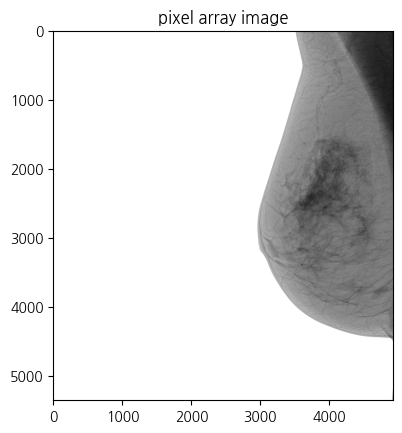

In [ ]:
plt.imshow(b, 'gray')
print("After apply_modality_lut = ", a.max(), a.min())
print("After apply_voi_lut      = ", b.max(), b.min())
plt.title('voi image')

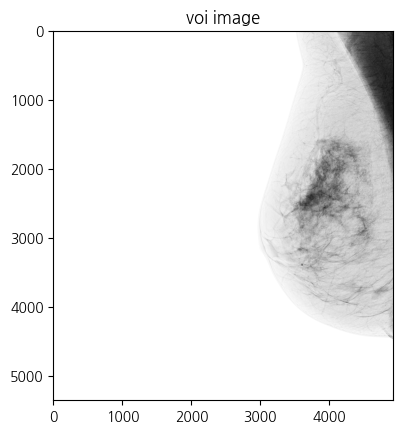

### sample들 랜덤하게 plot 해보기

In [ ]:
import matplotlib.pyplot as plt

for i in range(0, len(rsna_data), 100):
  dicom_data = pydicom.dcmread(rsna_data['path'][i])

  # 'Modality' lookup table 적용
  data = apply_modality_lut(dicom_data.pixel_array, dcm)

  # 'VOI' lookup table 적용
  data = apply_voi_lut(data, dcm)

  plt.imshow(data, 'gray')
  plt.title("cancer=" + str(rsna_data['cancer'][i]))
  plt.show()

In [ ]:
# apply_voi_lut 빼기 

import matplotlib.pyplot as plt

for i in range(0, len(rsna_data), 100):
  dicom_data = pydicom.dcmread(rsna_data['path'][i])

  # 'Modality' lookup table 적용
  data = apply_modality_lut(dicom_data.pixel_array, dcm)

  plt.imshow(data, 'gray')
  plt.title("cancer=" + str(rsna_data['cancer'][i]))
  plt.show()

# - 고찰

- 나이에 따라서 영향을 미칠수있다.                 -> 마지막 classifier에 age를 주입?
- L, R에 편견이 없다.                             -> horizontal augmentation 사용 가능.
- 배경과 전경에 intensity 반전에 강건해야 한다.     -> Invert augmentation으로 해결 가능.
- apply_voi_lut는 이번 task에서는 고려해봐야 한다. -> 빼자...
